# Question 2

### In this question you are to create some simulated data sets and then use the Perceptron neuron to perform some classification.

#### a/ Randomly create 2500 data-points (x, y)’s of class -1 to lie one side of the function f above and 2500 data-points (x, y)’s of class +1 to lie on the other side of the function. Indeed, here, you are not required to create your data using the function f above; you can use any function you want, as long as it is a simple linearly separable function of your choice to be used to separate 5000 data points into two classes (I have mentioned the function above simply because you have it already).

In [72]:
import numpy as np
import matplotlib.pyplot as plt

plus_1 = []
minus_1 = []
slope = 5
intercept = -5

#We will be using y = ax + b as our f function
for i in range(10000):
    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)

    num = slope * x + intercept
    if y < num:
        if len(minus_1) < 2500:
            minus_1.append((x, y))
    elif y >= num:
        if len(plus_1) < 2500:
            plus_1.append((x, y))

plus_1 = np.array(plus_1)
minus_1 = np.array(minus_1)

print("plus_1: ", plus_1)
print("plus_1's shape: ", plus_1.shape)
print("minus_1: ", minus_1)
print("minus_1's shape: ", minus_1.shape)

plus_1:  [[-4.29853455 -3.15326017]
 [-2.99065801 -4.99017019]
 [-1.70692274 -3.14961561]
 ...
 [-0.15205856  1.45900336]
 [-4.11958796 -0.06596213]
 [-3.63278192 -4.79730292]]
plus_1's shape:  (2500, 2)
minus_1:  [[ 4.6552662  -3.55711335]
 [ 2.0979741  -4.64048335]
 [ 3.9679715  -0.75469404]
 ...
 [ 3.18046173 -1.51069551]
 [ 2.24892694 -2.42475802]
 [ 2.25820853 -0.19974333]]
minus_1's shape:  (2500, 2)


#### b/ Implement the Perceptron learning algorithm and run it on your synthetic data set. Obtain the best Perceptron model via any cross-validation method of your choice. Use your creativity to tell me anything about your Perceptron: for example, how does the performance (speed and accuracy) vary when changing the learning rate, or when varying the size of the size of the training and test sets?

The following Perceptron implementation was done by following these tutorials: 
- https://www.youtube.com/watch?v=t2ym2a3pb_Y&t=304s
- https://www.youtube.com/watch?v=aOEoxyA4uXU

In [73]:
class Perceptron:
    def __init__(self, learning_rate=0.1, iterates=1000):
        self.learning_rate = learning_rate
        self.iterates = iterates
        self.activation_func = self._unit_step_func
        self.weight = None
        self.bias = None

    def fit(self, X, Y):
        samples, features = np.shape(X)
        self.weight = np.zeros(features)
        self.bias = 0

        Y_ = []
        for i in range(len(Y)):
            if Y[i][1] > 0:
                Y_.append(1)
            else:
                Y_.append(0)

        for _ in range(self.iterates):
            for index, x_i in enumerate(X):
                output = np.dot(x_i, self.weight) + self.bias
                Y_predicted = self.activation_func(output)

                update = self.learning_rate * (Y_[index] - Y_predicted)
                self.weight += update * np.array(x_i)
                self.bias += update

    def predict(self, X):
        output = np.dot(X, self.weight) + self.bias
        Y_predicted = self.activation_func(output)
        return Y_predicted
    
    def _unit_step_func(self, x):
        return np.where(x > 0, 1, 0)

The Perceptron algorithm was ran 4 times with different learning rates and interations. As we increased the learning rate, the models took longer to train but didn't affect the final prediction values. On the other hand, when we increase the number of iternations, the models also took longer to train and the final prediction values can be greatly affected.

In [74]:
from sklearn.model_selection import train_test_split
import time

x_train, x_test, y_train, y_test = train_test_split(plus_1, minus_1, random_state=0)

Total time:  82.03748750686646


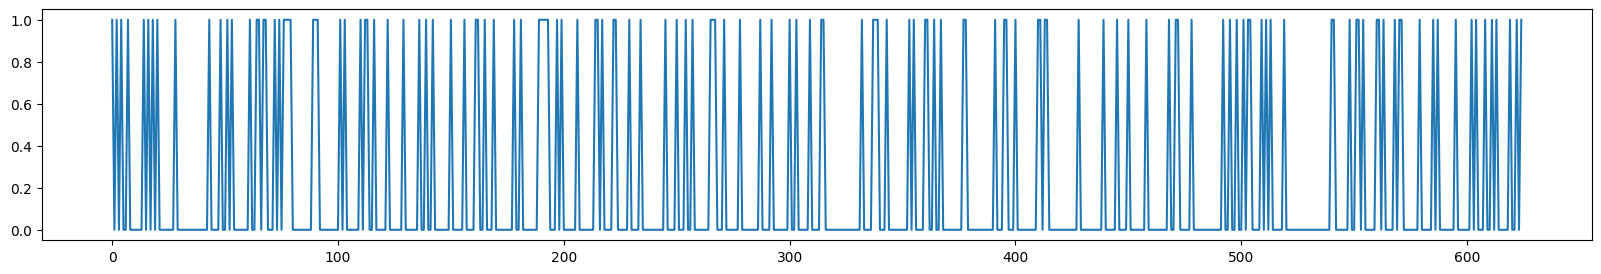

In [75]:
model1 = Perceptron(learning_rate=1, iterates=10000)
start = time.time()
model1.fit(x_train, y_train)
prediction = model1.predict(x_test)
end = time.time()
total = end - start
print("Total time: ", total)

plt.figure(figsize=(20, 3))
plt.plot(prediction)
plt.show()

Total time:  89.54419255256653


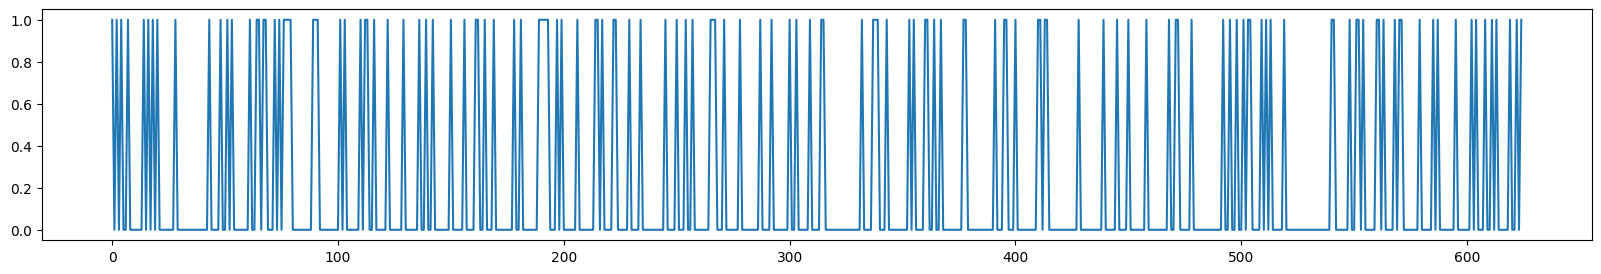

In [76]:
model2 = Perceptron(learning_rate=0.5, iterates=10000)
start = time.time()
model2.fit(x_train, y_train)
prediction = model2.predict(x_test)
end = time.time()
total = end - start
print("Total time: ", total)

plt.figure(figsize=(20, 3))
plt.plot(prediction)
plt.show()

Total time:  8.331864356994629


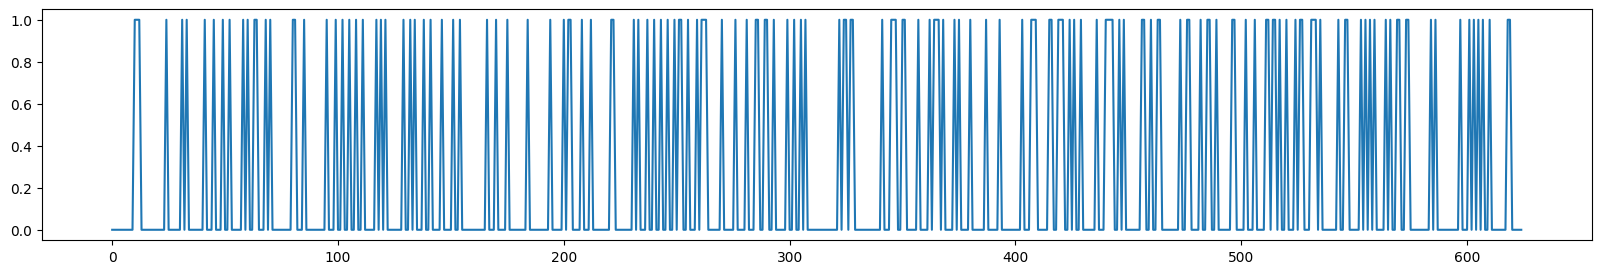

In [77]:
model3 = Perceptron(learning_rate=1, iterates=1000)
start = time.time()
model3.fit(x_train, y_train)
prediction = model3.predict(x_test)
end = time.time()
total = end - start
print("Total time: ", total)

plt.figure(figsize=(20, 3))
plt.plot(prediction)
plt.show()

Total time:  8.995695352554321


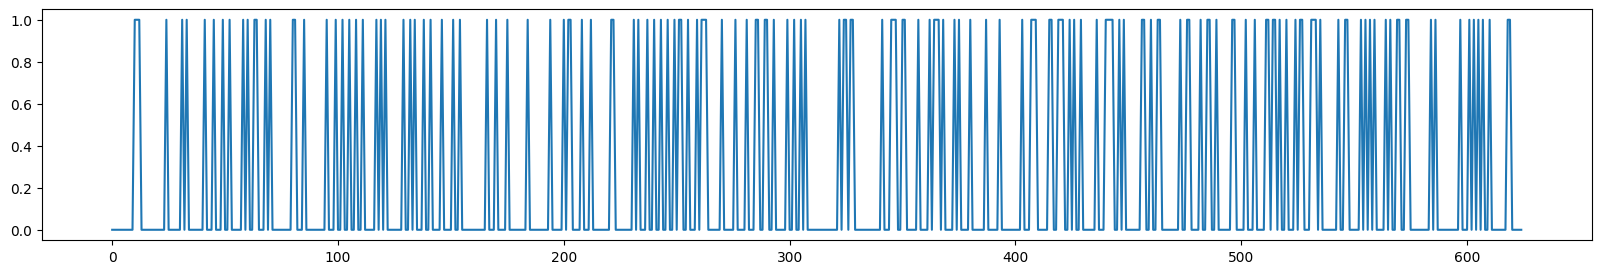

In [78]:
model4 = Perceptron(learning_rate=0.5, iterates=1000)
start = time.time()
model4.fit(x_train, y_train)
prediction = model4.predict(x_test)
end = time.time()
total = end - start
print("Total time: ", total)

plt.figure(figsize=(20, 3))
plt.plot(prediction)
plt.show()

#### c/ Repeat the task above but replace the Perceptron learning algorithm with any one of its variants mentioned in Slide-23 of the Single Neuron chapter, that is: pocket algorithm, the max-over learning algorithm, the algorithm, the voted perceptron algorithm,  min-over learning algorithm, AdaTron learning algorithm, or the α-perceptron learning algorithm. Implement only one of these variants; they are not discussed in class, though you can find them online via Google search (eg, https://www.google.com/search?client=safari&rls=en&q=Pocket+algorithm&ie=UTF-8&oe=UTF-8).

In [79]:
class Pocket:
    def __init__(self, iterates=1000):
        self.iterates = iterates
        self.activation_func = self._unit_step_func
        self.weight = None
        self.best_weight = None
        self.best_score = -1

    def fit(self, X, y):
        samples, features = np.shape(X)
        self.weight = np.zeros(features)
        self.best_weight = np.copy(self.weight)

        y_ = []
        for i in range(len(y)):
            if y[i][1] > 0:
                y_.append(1)
            else:
                y_.append(0)

        for _ in range(self.iterates):
            for i in range(samples):
                output = np.dot(X[i], self.weight) * y[i]
                if output.all() <= 0:
                    self.weight += y[i] + X[i]
                    score = self._score(X[i], y[i], self.weight)
                    if score > self.best_score:
                        self.best_score = score
                        self.best_weight = np.copy(self.weight)

    def _score(self, X, y, weight):
        prediction = np.sign(np.dot(X, weight))
        return np.sum(prediction == y)

    def predict(self, X):
        output = np.dot(X, self.best_weight)
        Y_predicted = self.activation_func(output)
        return Y_predicted
    
    def _unit_step_func(self, x):
        return np.where(x > 0, 1, 0)

For the Pocket learning algorithm, we ran the training algorithm 3 times with different number of iterations. Same with the Perceptron learning algorithm above, when we increased the number of iterations, the models took longer to train. However, unlike the Perceptron algorithm, the number of iterations didn't affect the final prediction values.

Total time:  5.834909677505493


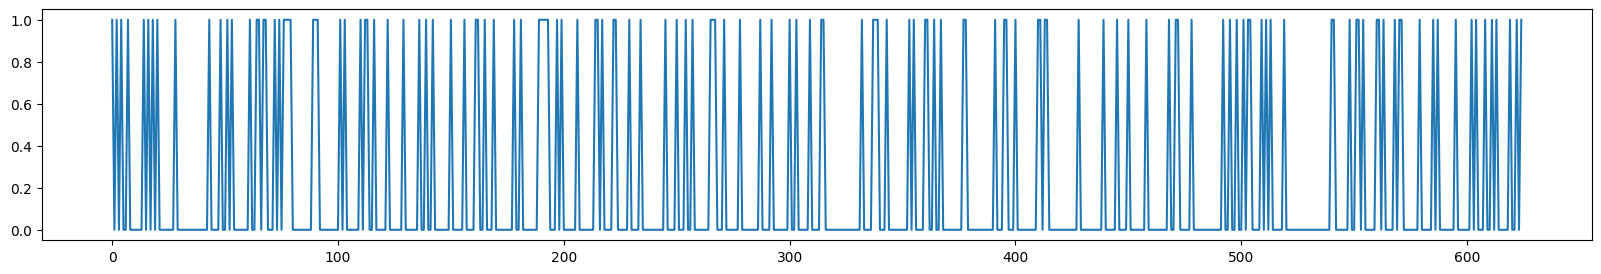

In [80]:
model5 = Pocket()
start = time.time()
model5.fit(x_train, y_train)
prediction = model5.predict(x_test)
end = time.time()
total = end - start
print("Total time: ", total)

plt.figure(figsize=(20, 3))
plt.plot(prediction)
plt.show()

Total time:  57.132195234298706


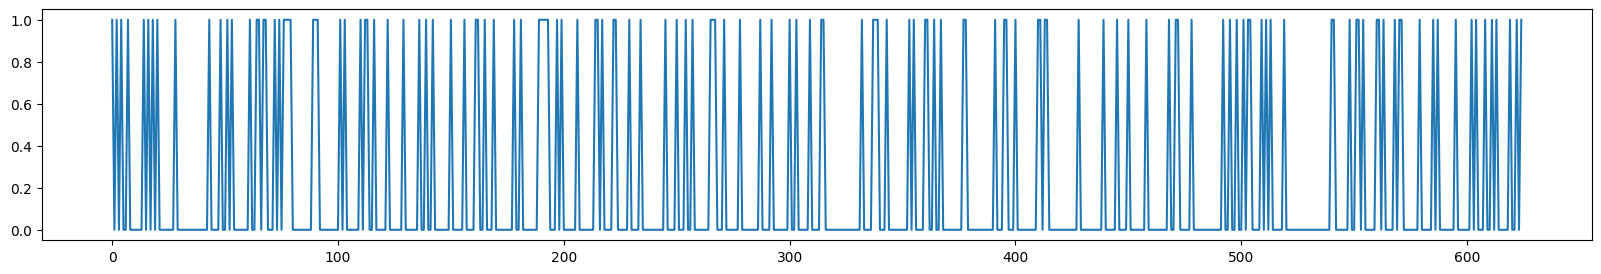

In [81]:
model6 = Pocket(iterates=10000)
start = time.time()
model6.fit(x_train, y_train)
prediction = model6.predict(x_test)
end = time.time()
total = end - start
print("Total time: ", total)

plt.figure(figsize=(20, 3))
plt.plot(prediction)
plt.show()

Total time:  305.2284893989563


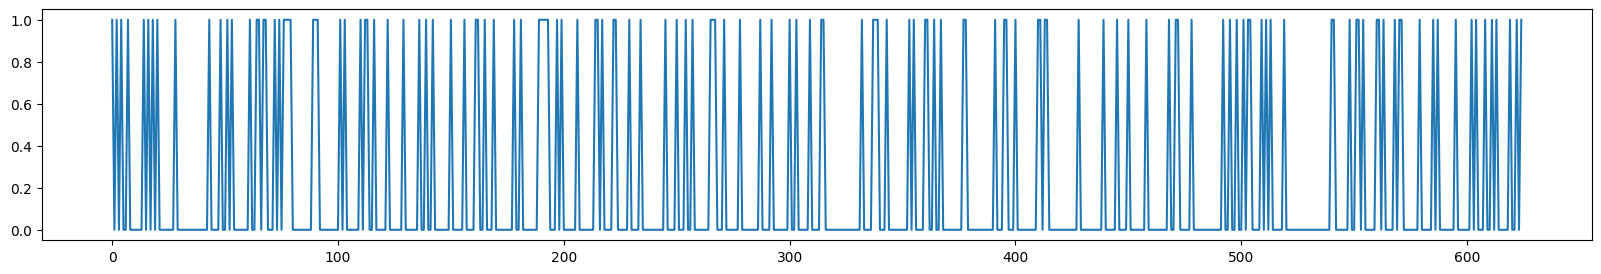

In [84]:
model7 = Pocket(iterates=20000)
start = time.time()
model7.fit(x_train, y_train)
prediction = model7.predict(x_test)
end = time.time()
total = end - start
print("Total time: ", total)

plt.figure(figsize=(20, 3))
plt.plot(prediction)
plt.show()